## FORECASTING USING ARIMA(ARMA) EXTENSIONS

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff

from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


##### TASK 1 - DATA PREPARATION

In [2]:
#IMPORTING DATASETS
train_df1=pd.read_csv('DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv',index_col='date',parse_dates=True)
test_df1=pd.read_csv('DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv',index_col='date',parse_dates=True)
print('TRAIN:',train_df1.shape,'\nTEST:',test_df1.shape)
train_df1.head(2),test_df1.head(2)

TRAIN: (1462, 4) 
TEST: (114, 4)


(            meantemp  humidity  wind_speed  meanpressure
 date                                                    
 2013-01-01      10.0      84.5        0.00   1015.666667
 2013-01-02       7.4      92.0        2.98   1017.800000,
              meantemp   humidity  wind_speed  meanpressure
 date                                                      
 2017-01-01  15.913043  85.869565    2.743478     59.000000
 2017-01-02  18.500000  77.222222    2.894444   1018.277778)

In [3]:
#COMBINING TRAIN AND TEST DATASETS
df=pd.concat([train_df1,test_df1])
print(df.shape)
df.head(2)

(1576, 4)


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.0,84.5,0.00,1015.666667
2013-01-02,7.4,92.0,2.98,1017.800000


##### VISUAL OF MEAN TEMP

<AxesSubplot:xlabel='date'>

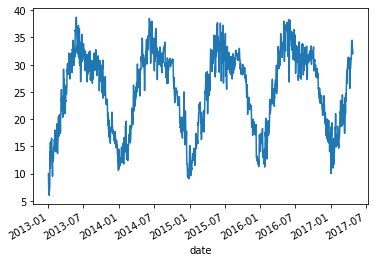

In [4]:
df['meantemp'].plot()

##### SAMPLING THE DATA FOR 7 DAYS

In [5]:
df1=df.resample('7D').mean()
print(df1.shape)
df1.head(2)

(225, 4)


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,7.604762,83.295238,2.903810,1017.685714
2013-01-08,13.176871,66.511905,8.013265,1015.942177


In [6]:
df1_meantemp=df1['meantemp']
df1_meantemp

date
2013-01-01     7.604762
2013-01-08    13.176871
2013-01-15    13.409524
2013-01-22    12.848639
2013-01-29    16.107653
                ...    
2017-03-21    27.752381
2017-03-28    30.346372
2017-04-04    28.427638
2017-04-11    30.492063
2017-04-18    33.432143
Freq: 7D, Name: meantemp, Length: 225, dtype: float64

##### SPLITTING DATASET INTO 70 % TRAIN AND 30 % TEST

In [7]:
split= int(round(0.7 * len(df1_meantemp),0))
train_df=df1_meantemp.iloc[:split]
test_df=df1_meantemp.iloc[split:]
print(train_df.shape,test_df.shape)
train_df.head(2),test_df.head(2)

(158,) (67,)


(date
 2013-01-01     7.604762
 2013-01-08    13.176871
 Freq: 7D, Name: meantemp, dtype: float64,
 date
 2016-01-12    15.099405
 2016-01-19    12.233759
 Freq: 7D, Name: meantemp, dtype: float64)

#####  STATIONARITY

In [8]:
# Augmented dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]

    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [9]:
#TRAINING
r=checkStationarity(train_df)
print('TRAINING:\n',r)
#TESTING
r=checkStationarity(test_df)
print('TESTING:\n',r)

TRAINING:
 p-value=0.0005574502790166439. Data is stationary
TESTING:
 p-value=0.038746605571277085. Data is stationary


##### PLOT ACF AND PACF

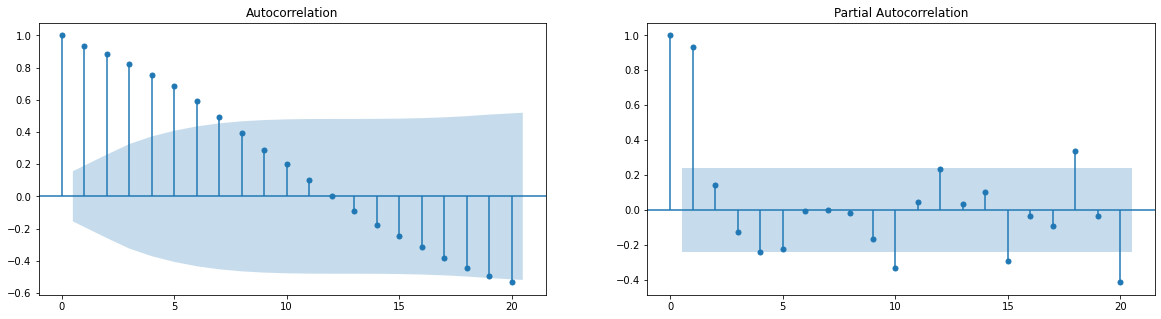

In [10]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
plot_acf(train_df,lags=20,ax=ax[0])
plot_pacf(test_df,lags=20,ax=ax[1])
plt.show()

P value can be upto 8 and Q value can be upto 2

##### TASK 2 -  ARIMA MODEL

#####  AUTO ARIMA SELECTION FOR p,q VALUES

In [11]:
m = auto_arima(train_df,start_p=0,max_p=8, start_q=0,max_q=2,seasonal=False, trace=True)
print(m.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1478.998, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1282.230, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=693.195, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=694.690, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=693.230, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1131.207, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=683.274, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=685.743, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=662.077, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=691.846, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=693.696, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54

From this method we get p=2 and q=2

##### PUTTING p AND q VALUES IN THE MODEL TO FIT

In [12]:
d=1
for p in range(1,3):
    for q in range(1,3):
        print('p=',p,'q=',q)
        m1 = ARIMA(train_df,order=(p,d,q)).fit()    
        print(m1.summary())

p= 1 q= 1
                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  158
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -337.242
Date:                Thu, 28 Apr 2022   AIC                            680.484
Time:                        12:12:51   BIC                            689.653
Sample:                    01-01-2013   HQIC                           684.208
                         - 01-05-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9042      0.106      8.512      0.000       0.696       1.112
ma.L1         -0.8250      0.146     -5.658      0.000      -1.111      -0.539
sigma2         4.2953      0.504      8.52

 We get P=2 D=1 Q=2

##### PREDICTING TEMPERATURE OF TEST DATA USING MODEL

In [55]:
def buildModelPredict(train,test,p,d,q):
    ret={}
    model=ARIMA(train,order=(p,d,q)).fit()
    pred=model.predict(0,len(test))
    actual=[];predicted=[];
    for i in range(len(test)):
        actual.append(test[i])
        predicted.append(pred[i])
    df_result = pd.DataFrame({'actual':actual, 'predicted':predicted})
    df_result['err'] = df_result.actual - df_result.predicted
    
    ret['model']=model
    ret['results']=df_result
    ret['actual']=actual
    ret['predicted']=predicted
    print('Predicted values:\n',df_result['predicted'])
    return(ret)

In [56]:
def summarizeModel(out,p,d,f,disp=False):
    model=out['model']
    if (disp):
        print(model.summary())
    res1=out['results']
    mse1=mean_squared_error(res1.actual,res1.predicted)
    print("MSE = {}\nRMSE = {}".format(mse1,np.sqrt(mse1)))

In [57]:
p=2;d=1;q=2;
r1=buildModelPredict(train_df,test_df,p,d,q)

Predicted values:
 0      0.000000
1      7.604760
2     12.921146
3     13.888389
4     13.795256
        ...    
62    19.637469
63    21.728244
64    23.503314
65    25.324113
66    27.604747
Name: predicted, Length: 67, dtype: float64


In [58]:
summarizeModel(r1,p,d,q)

MSE = 18.770648528713203
RMSE = 4.332510649578741


##### PLOTTING ACTUAL AND PREDICTED DATA

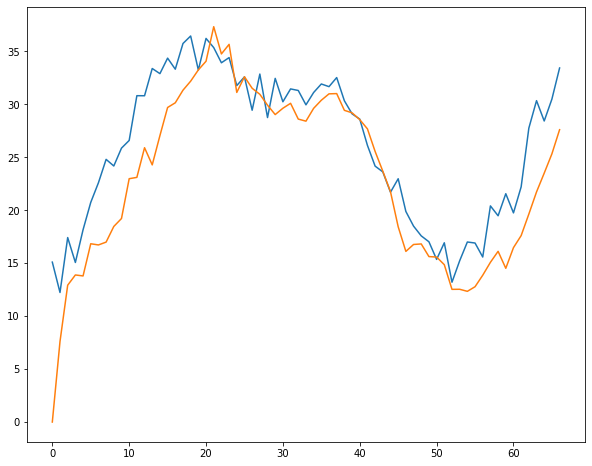

In [61]:
plt.figure(figsize=(10,8))
plt.plot(r1['actual'],label='actual')
plt.plot(r1['predicted'],label='predicted')
plt.show()

In [48]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


##### TASK 3 - SARIMA MODEL

In [18]:
checkStationarity(train_df)

'p-value=0.0005574502790166439. Data is stationary'

##### DECOMPOSED COMPONENTS OF THE DATA

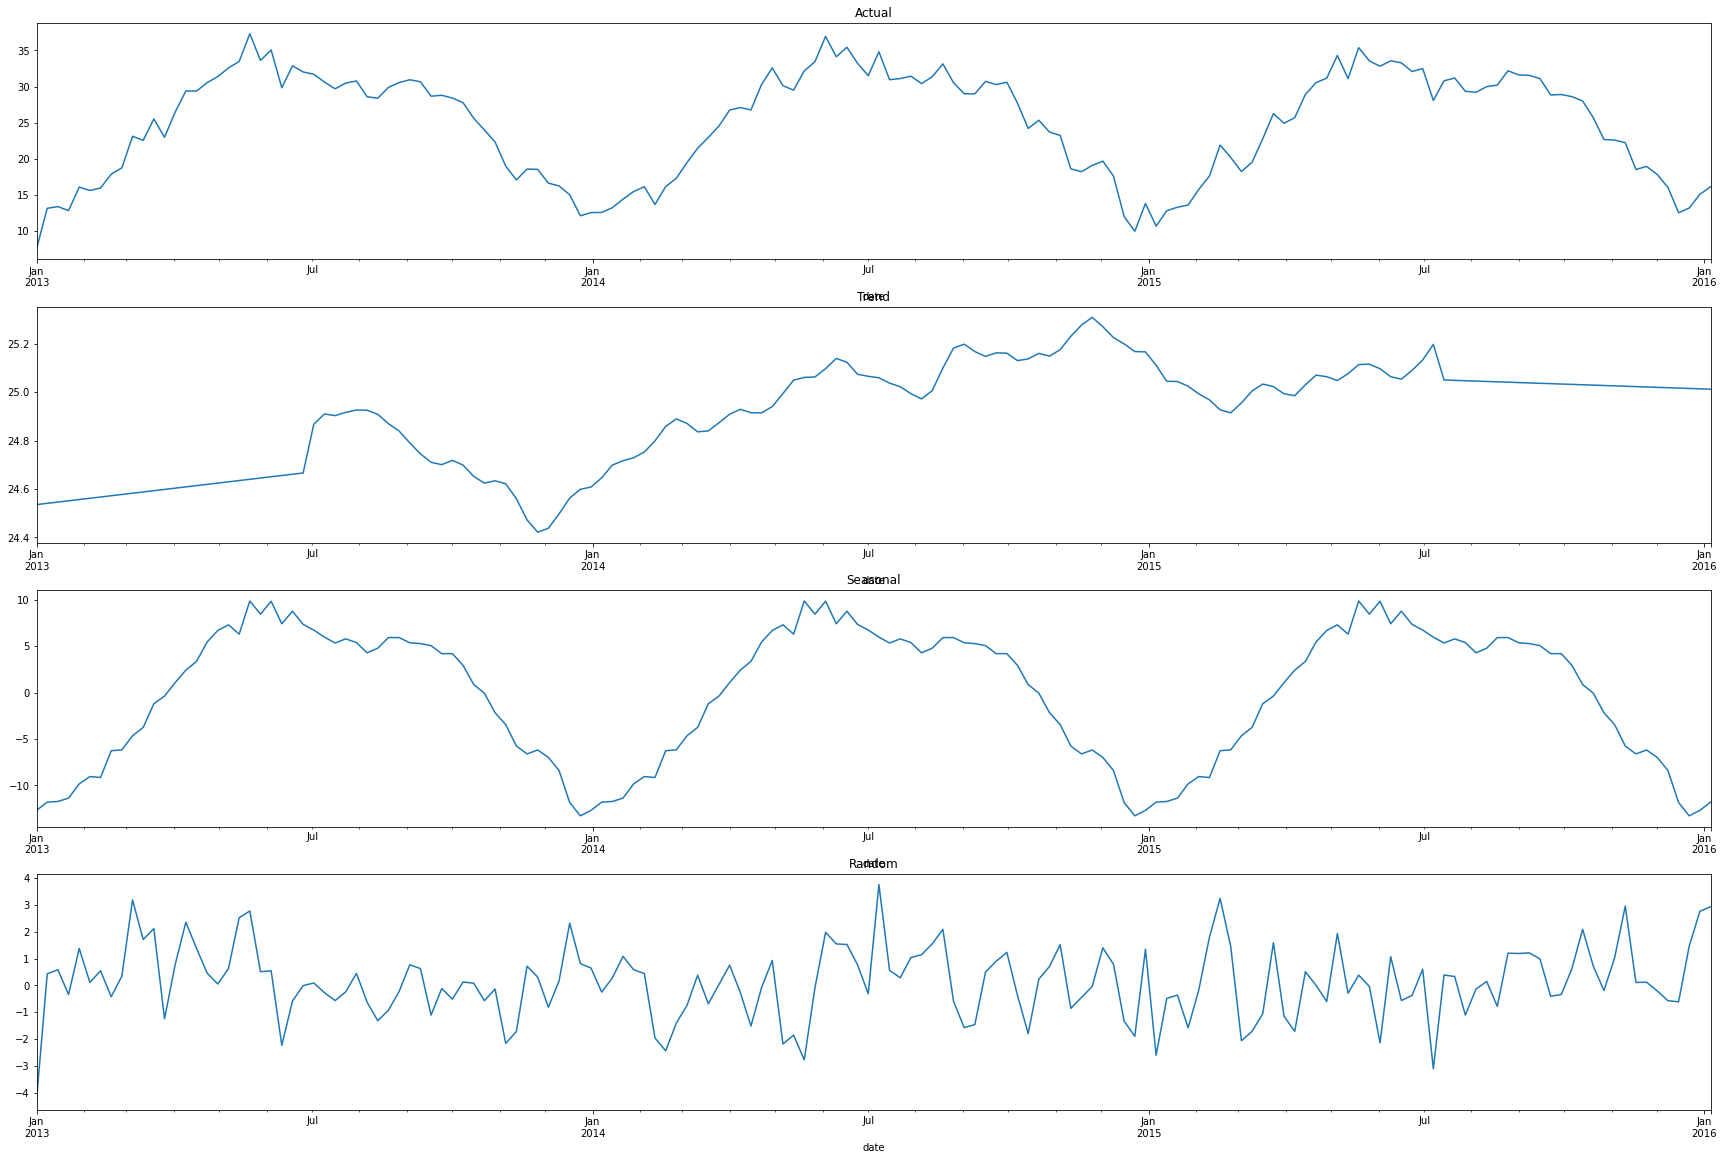

In [19]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(30,20))

result = seasonal_decompose(train_df, period=52, extrapolate_trend='freq')

result.observed.plot(ax=ax[0])
ax[0].set_title("Actual")

result.trend.plot(ax=ax[1])
ax[1].set_title("Trend")

result.seasonal.plot(ax=ax[2])
ax[2].set_title("Seasonal")

result.resid.plot(ax=ax[3])
ax[3].set_title("Random")

plt.show()

There is trend and seasonality in this data

In [43]:
# build model
for p in range(1,8):
    for q in range(1,3):
        for d in range(0,2):
            print(p,d,q)
            m2 = sm.tsa.statespace.SARIMAX(train_df,order=(p,d,q),seasonal_order=(1,0,0,52)).fit()
            print(m2.summary())

1 0 1
                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  158
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood                -339.642
Date:                             Thu, 28 Apr 2022   AIC                            687.284
Time:                                     13:32:36   BIC                            699.534
Sample:                                 01-01-2013   HQIC                           692.259
                                      - 01-05-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9933      0.006    152.926      0.000       0.981       1.006
ma.L1         -0.0940

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  158
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 52)   Log Likelihood                -332.935
Date:                             Thu, 28 Apr 2022   AIC                            675.870
Time:                                     13:32:41   BIC                            691.151
Sample:                                 01-01-2013   HQIC                           682.076
                                      - 01-05-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6807      0.150      4.550      0.000       0.387       0.974
ar.L2          0.1912      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  158
Model:             SARIMAX(3, 1, 1)x(1, 0, [], 52)   Log Likelihood                -332.082
Date:                             Thu, 28 Apr 2022   AIC                            676.164
Time:                                     13:32:48   BIC                            694.502
Sample:                                 01-01-2013   HQIC                           683.612
                                      - 01-05-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6148      0.185      3.316      0.001       0.251       0.978
ar.L2          0.1218      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  158
Model:             SARIMAX(4, 1, 1)x(1, 0, [], 52)   Log Likelihood                -330.571
Date:                             Thu, 28 Apr 2022   AIC                            675.142
Time:                                     13:33:03   BIC                            696.535
Sample:                                 01-01-2013   HQIC                           683.830
                                      - 01-05-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5162      0.194      2.658      0.008       0.136       0.897
ar.L2          0.0962      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  158
Model:             SARIMAX(5, 1, 1)x(1, 0, [], 52)   Log Likelihood                -326.613
Date:                             Thu, 28 Apr 2022   AIC                            669.227
Time:                                     13:33:18   BIC                            693.677
Sample:                                 01-01-2013   HQIC                           679.157
                                      - 01-05-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2305      0.222      1.036      0.300      -0.206       0.666
ar.L2          0.0586      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  158
Model:             SARIMAX(6, 1, 1)x(1, 0, [], 52)   Log Likelihood                -325.358
Date:                             Thu, 28 Apr 2022   AIC                            668.715
Time:                                     13:33:30   BIC                            696.221
Sample:                                 01-01-2013   HQIC                           679.886
                                      - 01-05-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4897      0.317     -1.546      0.122      -1.111       0.131
ar.L2         -0.0375      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  158
Model:             SARIMAX(7, 1, 1)x(1, 0, [], 52)   Log Likelihood                -325.254
Date:                             Thu, 28 Apr 2022   AIC                            670.507
Time:                                     13:33:44   BIC                            701.069
Sample:                                 01-01-2013   HQIC                           682.920
                                      - 01-05-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7219      1.011     -0.714      0.475      -2.703       1.259
ar.L2         -0.0855      

Choosing (p,d,q) = (3,0,2)

In [44]:
m2 = sm.tsa.statespace.SARIMAX(train_df,order=(3,0,2),seasonal_order=(1,0,0,52)).fit()
print(m2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                  158
Model:             SARIMAX(3, 0, 2)x(1, 0, [], 52)   Log Likelihood                -337.889
Date:                             Thu, 28 Apr 2022   AIC                            689.777
Time:                                     13:33:55   BIC                            711.215
Sample:                                 01-01-2013   HQIC                           698.484
                                      - 01-05-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3424      0.123     -2.787      0.005      -0.583      -0.102
ar.L2          0.4112      

##### FORECASTING FUTURE DATA USING SARIMA MODEL

In [45]:
fcast=m2.forecast(len(test_df))
fcast

2016-01-12    16.196723
2016-01-19    16.595703
2016-01-26    16.491556
2016-02-02    16.768729
2016-02-09    17.529521
                ...    
2017-03-21    13.487451
2017-03-28    13.293854
2017-04-04    13.313903
2017-04-11    13.414570
2017-04-18    13.466917
Freq: 7D, Name: predicted_mean, Length: 67, dtype: float64

##### VISUALIZING THE FORECASTED DATA USING SARIMA MODEL

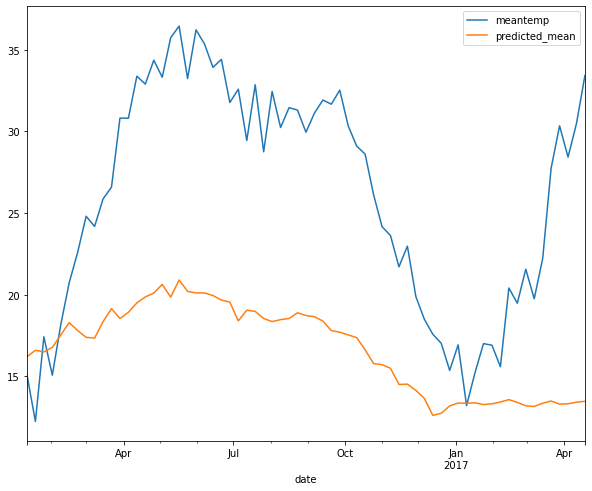

In [46]:
test_df.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)
plt.show()

In [47]:
# MSE & RMSE
mse2 = mean_squared_error(test_df,fcast)
print("MSE = {}\nRMSE = {}".format(mse2,np.sqrt(mse2)))

MSE = 116.44910226411882
RMSE = 10.791158522796282


##### TASK 4 - SARIMAX MODEL

##### SPLITTING EXOGENEOUS FEATURES OF THE DATA

In [24]:
exog_train=train_df1[['humidity', 'wind_speed', 'meanpressure']]
exog_test=test_df1[['humidity', 'wind_speed', 'meanpressure']]
exog_train.head(2),exog_test.head(2)

(            humidity  wind_speed  meanpressure
 date                                          
 2013-01-01      84.5        0.00   1015.666667
 2013-01-02      92.0        2.98   1017.800000,
              humidity  wind_speed  meanpressure
 date                                           
 2017-01-01  85.869565    2.743478     59.000000
 2017-01-02  77.222222    2.894444   1018.277778)

##### BUILDING MODEL USING EXOGENEOUS FEATURES

In [37]:
# build model
for p in range(1,8):
    for q in range(1,3):
        for d in range(0,2):
            print('p=',p,'d=',d,'q=',q)
            m3 = SARIMAX(train_df1['meantemp'], order=(p,d,q), seasonal_order=(1,0,0,52),exog=exog_train.values).fit()
            print(m3.summary())

p= 1 d= 0 q= 1
                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood               -2616.117
Date:                             Thu, 28 Apr 2022   AIC                           5246.233
Time:                                     12:47:13   BIC                           5283.246
Sample:                                 01-01-2013   HQIC                          5260.040
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1312      0.004    -35.001      0.000      -0.139      -0.124
x2          

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 52)   Log Likelihood               -2416.868
Date:                             Thu, 28 Apr 2022   AIC                           4849.735
Time:                                     12:51:45   BIC                           4892.036
Sample:                                 01-01-2013   HQIC                          4865.514
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1353      0.003    -44.879      0.000      -0.141      -0.129
x2            -0.0295      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(3, 0, 1)x(1, 0, [], 52)   Log Likelihood               -2825.989
Date:                             Thu, 28 Apr 2022   AIC                           5669.979
Time:                                     12:57:51   BIC                           5717.567
Sample:                                 01-01-2013   HQIC                          5687.730
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1407      0.005    -29.083      0.000      -0.150      -0.131
x2            -0.0010      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(4, 0, 1)x(1, 0, [], 52)   Log Likelihood               -2566.981
Date:                             Thu, 28 Apr 2022   AIC                           5153.962
Time:                                     13:03:26   BIC                           5206.837
Sample:                                 01-01-2013   HQIC                          5173.685
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1472      0.004    -41.116      0.000      -0.154      -0.140
x2            -0.0120      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(5, 0, 1)x(1, 0, [], 52)   Log Likelihood               -2452.475
Date:                             Thu, 28 Apr 2022   AIC                           4926.950
Time:                                     13:10:23   BIC                           4985.114
Sample:                                 01-01-2013   HQIC                          4948.646
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1462      0.004    -40.735      0.000      -0.153      -0.139
x2            -0.0257      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(6, 0, 1)x(1, 0, [], 52)   Log Likelihood               -2412.504
Date:                             Thu, 28 Apr 2022   AIC                           4849.008
Time:                                     13:17:35   BIC                           4912.459
Sample:                                 01-01-2013   HQIC                          4872.676
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1431      0.004    -40.617      0.000      -0.150      -0.136
x2            -0.0215      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(7, 0, 1)x(1, 0, [], 52)   Log Likelihood                   0.000
Date:                             Thu, 28 Apr 2022   AIC                             26.000
Time:                                     13:26:47   BIC                             94.738
Sample:                                 01-01-2013   HQIC                            51.640
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.0266      0.005    633.711      0.000       3.017       3.036
x2            17.3254      

                                      SARIMAX Results                                      
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(7, 1, 2)x(1, 0, [], 52)   Log Likelihood               -2348.240
Date:                             Thu, 28 Apr 2022   AIC                           4724.481
Time:                                     13:30:38   BIC                           4798.497
Sample:                                 01-01-2013   HQIC                          4752.091
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1405      0.003    -41.028      0.000      -0.147      -0.134
x2            -0.0274      

 Choosing (p,d,q) = (4,0,2)

In [38]:
m3 = SARIMAX(train_df1['meantemp'], order=(4,0,2), seasonal_order=(1,0,0,52),exog=exog_train.values).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(4, 0, 2)x(1, 0, [], 52)   Log Likelihood               -3572.863
Date:                             Thu, 28 Apr 2022   AIC                           7167.725
Time:                                     13:31:35   BIC                           7225.889
Sample:                                 01-01-2013   HQIC                          7189.421
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2529      0.008    -30.342      0.000      -0.269      -0.237
x2             0.3024      0.012     25.503      0.000       0.279       0.326
x3            -0.0008      0.000     -6.673      0.000      -0.001      -0.001
ar.L1         -0.2836      0.037     -7.732      0.000      -0.356      -0.212
ar.L2          0.2263      0.039      5.847      0.000       0.150       0.302
ar.L3          0.4641      0.039     12.022      0.000       0.388       0.540
ar.L4          0.5781      0.033     17.488      0.000       0.513       0.643
ma.L1          1.2455      0.030     41.681      0.000       1.187       1.304
ma.L2          0.6021      0.032     18.852      0.000       0.540       0.665
ar.S.L52       0.1662      0.031      5.311      0.000       0.105       0.227
sigma2         9.0557      0.499     18.153      0.000       8.078      10.033
===================================================================================
Ljung-Box (L1) (Q):                  98.53   Jarque-Bera (JB):               212.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### FORECASTING THE FUTURE DATA USING SARIMAX MODEL

In [40]:
fcast1=m3.forecast(len(test_df1),exog=exog_test.values)
fcast1

2017-01-02    15.234905
2017-01-03    16.120833
2017-01-04    15.755496
2017-01-05    18.795847
2017-01-06    16.435691
                ...    
2017-04-21    18.361307
2017-04-22    15.687124
2017-04-23    15.788775
2017-04-24    19.419848
2017-04-25    20.087191
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

##### VISUALIZING THE FORECASTED DATA USING SARIMA MODEL

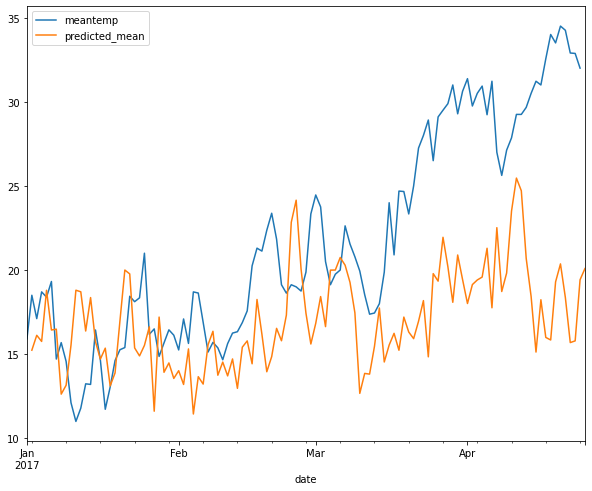

In [41]:
test_df1['meantemp'].plot(figsize=(10,8),legend=True)
fcast1.plot(legend=True)
plt.show()

In [42]:
# MSE & RMSE

mse3 = mean_squared_error(test_df1['meantemp'],fcast1)
print("MSE = {}\nRMSE = {}".format(mse3,np.sqrt(mse3)))

MSE = 52.16185392595798
RMSE = 7.222316382294394


In [ ]:
#END